# Image Recognition

Using neural network to recognise sets of hand written digits.

In [6]:
f =  open("semeion.data","rb")
data = f.read()

In [35]:
data = str(data)

In [202]:
a = data.split("\\r\\n")
a[0] = a[0].replace("b'",str(0))
a = a[:1593]

In [203]:
for i in range(len(a)):
    a[i]=[float(j) for j in a[i].split()]
    pixel[i]=a[i][:256]
    label[i]=[int(k) for k in a[i][256:]]

In [204]:
print("pixel and label length: ",len(pixel)," x ",len(pixel[1]))

pixel and label length:  1593  x  256


In [205]:
import numpy as np

In [206]:
X = np.array(pixel)
X = X.reshape(1593,16,16,1)

In [207]:
y = np.array(label)

In [208]:
y.shape

(1593, 10)

In [209]:
X.shape

(1593, 16, 16, 1)

In [248]:
X[1].shape

(16, 16, 1)

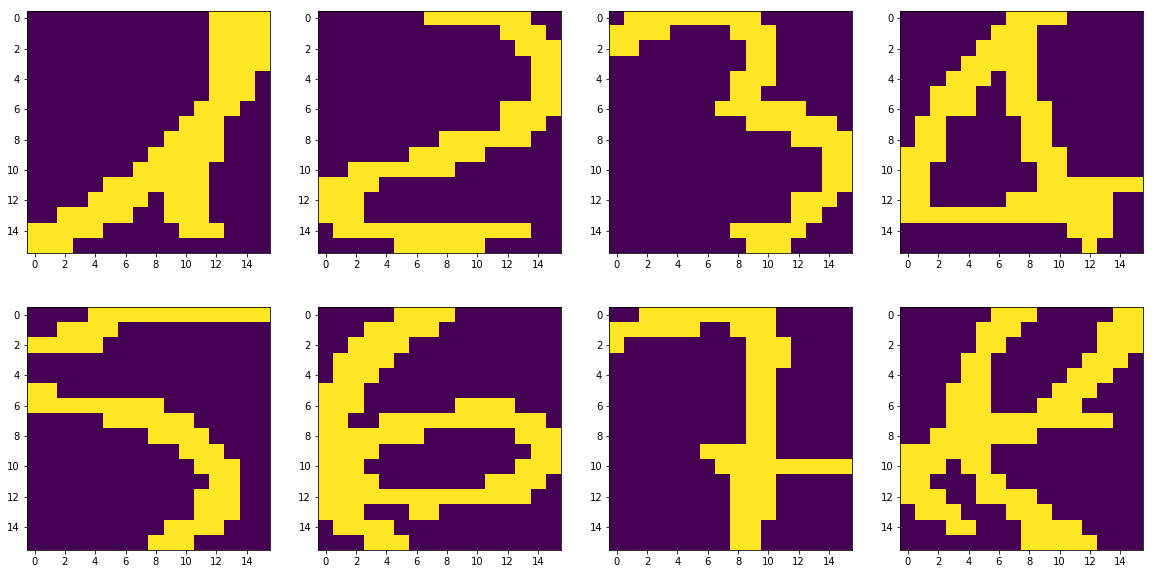

In [322]:
fig=plt.figure(figsize=(20, 10))

columns = 4
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X[i*20].reshape(16,16))
    
plt.show()

In [319]:
X.shape

(1593, 16, 16, 1)

In [299]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Conv2D, Flatten, Dense, Dropout

In [364]:
batch_size = 200
num_classes = 10
epochs = 30

# input image dimensions
input_shape = (16,16, 1)

In [365]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(input_shape),padding="same"))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

In [366]:
history = model.fit(X,y,epochs=epochs,batch_size=batch_size,verbose=1,validation_split=0.2)

Train on 1274 samples, validate on 319 samples
Epoch 1/30
1274/1274 [==============================] - 29s 23ms/step - loss: 2.8837 - acc: 0.2017 - val_loss: 1.8151 - val_acc: 0.2978
Epoch 2/30
1274/1274 [==============================] - 20s 15ms/step - loss: 1.3471 - acc: 0.5432 - val_loss: 1.0682 - val_acc: 0.6834
Epoch 3/30
1274/1274 [==============================] - 21s 16ms/step - loss: 0.7964 - acc: 0.7355 - val_loss: 0.7212 - val_acc: 0.7743
Epoch 4/30
1274/1274 [==============================] - 22s 17ms/step - loss: 0.5840 - acc: 0.7998 - val_loss: 0.6375 - val_acc: 0.7837
Epoch 5/30
1274/1274 [==============================] - 20s 16ms/step - loss: 0.3900 - acc: 0.8830 - val_loss: 0.3477 - val_acc: 0.8934
Epoch 6/30
1274/1274 [==============================] - 21s 17ms/step - loss: 0.2788 - acc: 0.9152 - val_loss: 0.3095 - val_acc: 0.8997
Epoch 7/30
1274/1274 [==============================] - 19s 15ms/step - loss: 0.2373 - acc: 0.9262 - val_loss: 0.2801 - val_acc: 0.9185
E

Text(0.5,0,'epoch')

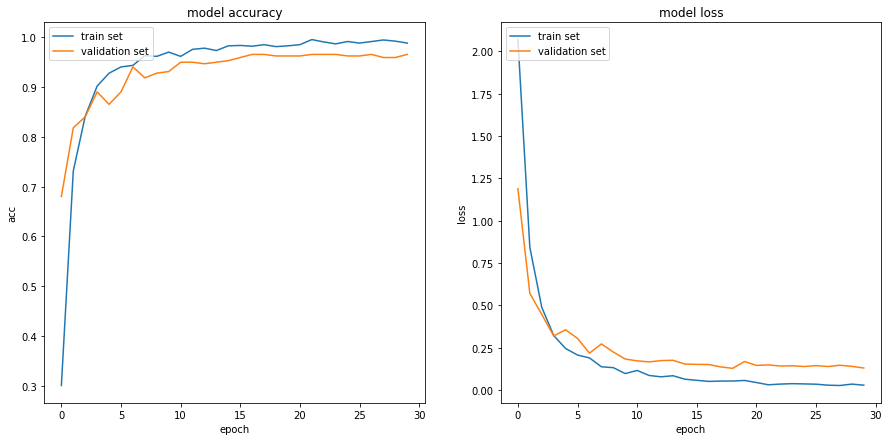

In [357]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(15,7))

ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].legend(['train set', 'validation set'], loc='upper left')
ax[0].set_title('model accuracy')
ax[0].set_ylabel('acc')
ax[0].set_xlabel('epoch')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].legend(['train set', 'validation set'], loc='upper left')
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')